# NAME : AKSHAY KAMATE
# BATCH : DSAUS03


# E-Commerce – EDA – Python Project 2

## Context of Data
###  Company - UK-based and registered non-store online retail
###  Products for selling - Mainly all-occasion gifts
###  Customers - Most are wholesalers (local or international)
###  Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.simplefilter('ignore')
sns.set_style('whitegrid')

In [3]:
import gc
import datetime


In [4]:
data = pd.read_csv('Ecommerce - UK Retailer.csv',encoding='unicode_escape')

In [5]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
data.shape

(541909, 8)

In [8]:
data.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [9]:
data.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


## 2. Check for missing values in all columns and replace them with the appropriate metric (mean/mode/median)|

In [11]:
data.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
country              0
unit_price           0
invoice_date         0
quantity             0
stock_code           0
invoice_num          0
dtype: int64

In [12]:
data[data.isnull().any(axis=1)].head()
# check out the rows with missing values

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [13]:
data['invoice_date'] = pd.to_datetime(data.invoice_date, format='%m/%d/%Y %H:%M')
# change the invoice_date format - String to Timestamp format

In [14]:
data['description'] = data.description.str.lower()
# change description - UPPER case to LOWER case

In [15]:
data.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 3. Remove duplicate rows

In [16]:
data = data.dropna()
# data_new without missing values

In [17]:
data.isnull().sum().sort_values(ascending=False)
# check missing values for each column A

country         0
cust_id         0
unit_price      0
invoice_date    0
quantity        0
description     0
stock_code      0
invoice_num     0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [19]:
data['cust_id'] = data['cust_id'].astype('int64')
#change columns type - String to Int type 

In [20]:
data.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  int64         
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [22]:
data.describe().round (2)

,quantity,unit_price,cust_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


## 4. Remove rows which have negative values in Quantity column

In [23]:
data = data[data.quantity >0]

In [24]:
data.describe().round(2)

,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


## adding a coloum amount_spent

In [25]:
data['amount_spent'] = data['quantity'] * data['unit_price']

In [26]:
data.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount_spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## 5. Add the columns - Month, Day and Hour for the invoice

In [27]:
data = data[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','cust_id','country']]
# rearranging the columns 

In [28]:
data["invoice_year"]=data['invoice_date'].dt.year
data["invoice_month"]=data['invoice_date'].dt.month
data["invoice_day"]=data['invoice_date'].dt.day
data["invoice_hour"]=data['invoice_date'].dt.hour
data["invoice_min"]=data['invoice_date'].dt.minute


In [29]:
data.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,cust_id,country,invoice_year,invoice_month,invoice_day,invoice_hour,invoice_min
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,17850,United Kingdom,2010,12,1,8,26
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,17850,United Kingdom,2010,12,1,8,26
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,17850,United Kingdom,2010,12,1,8,26
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,17850,United Kingdom,2010,12,1,8,26
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,17850,United Kingdom,2010,12,1,8,26


## 6. How many orders made by the customers?

In [30]:
data.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


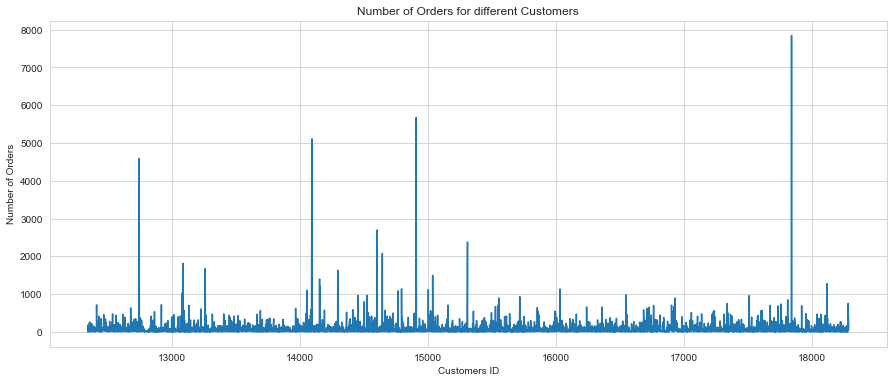

In [31]:
orders = data.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

## 7. TOP 5 customers with higher number of orders

In [32]:
print('The Top 5 customers with higher number of orders are')
orders.sort_values(by='invoice_num', ascending=False).head()

The Top 5 customers with higher number of orders are


,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


## adding amount_spent coloum

In [33]:
data['amount_spent'] = data['quantity'] * data['unit_price']

In [34]:
data.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,cust_id,country,invoice_year,invoice_month,invoice_day,invoice_hour,invoice_min,amount_spent
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,17850,United Kingdom,2010,12,1,8,26,15.30
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,17850,United Kingdom,2010,12,1,8,26,20.34
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,17850,United Kingdom,2010,12,1,8,26,22.00
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,17850,United Kingdom,2010,12,1,8,26,20.34
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,17850,United Kingdom,2010,12,1,8,26,20.34


## 8. How much money spent by the customers?

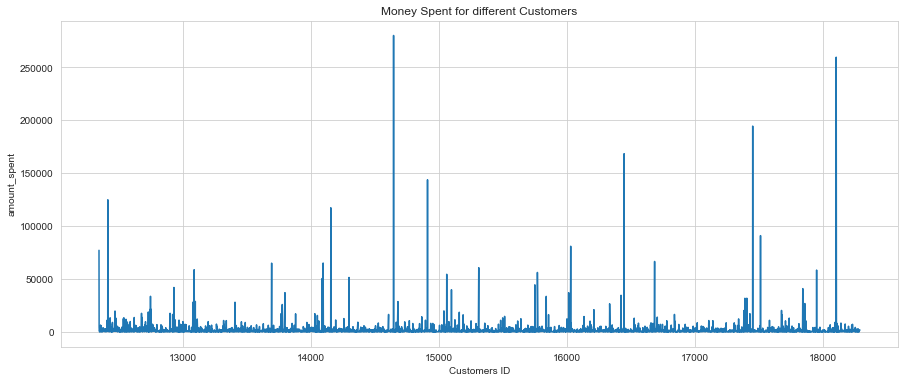

In [35]:
money_spent = data.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('amount_spent')
plt.title('Money Spent for different Customers')
plt.show()

## 9. TOP 5 customers with highest money spent

In [36]:
print('The Top 5 customers who spent highest money are')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The Top 5 customers who spent highest money are


,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


## 10. How many orders per month?

In [37]:
data.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,cust_id,country,invoice_year,invoice_month,invoice_day,invoice_hour,invoice_min,amount_spent
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,17850,United Kingdom,2010,12,1,8,26,15.30
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,17850,United Kingdom,2010,12,1,8,26,20.34
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,17850,United Kingdom,2010,12,1,8,26,22.00
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,17850,United Kingdom,2010,12,1,8,26,20.34
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,17850,United Kingdom,2010,12,1,8,26,20.34


In [38]:
data.groupby('invoice_num')['invoice_month'].value_counts().sort_index()

invoice_num  invoice_month
536365       12                7
536366       12                2
536367       12               12
536368       12                4
536369       12                1
                              ..
581583       12                2
581584       12                2
581585       12               21
581586       12                4
581587       12               15
Name: invoice_month, Length: 18536, dtype: int64

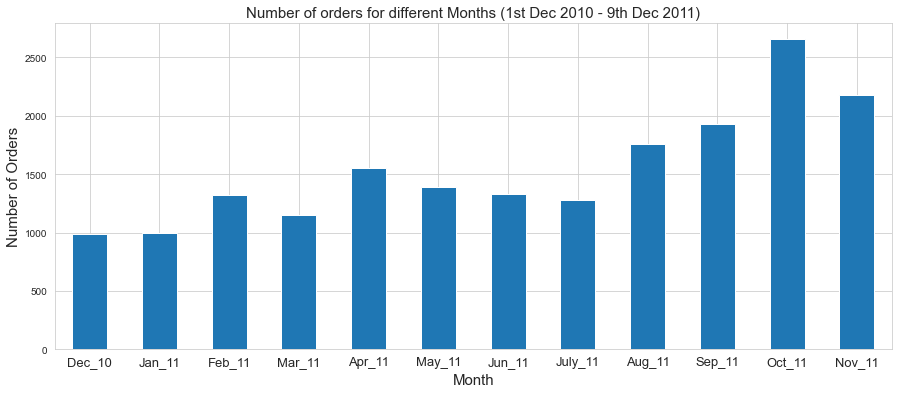

In [39]:
ax = data.groupby('invoice_num')['invoice_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

## 11. How many orders per day?

In [42]:
data.groupby('invoice_num')['invoice_day'].count()

invoice_num
536365     7
536366     2
536367    12
536368     4
536369     1
          ..
581583     2
581584     2
581585    21
581586     4
581587    15
Name: invoice_day, Length: 18536, dtype: int64

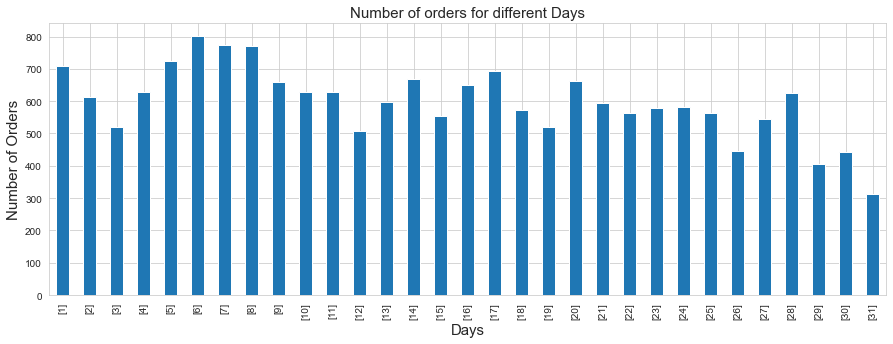

In [43]:
ax = data.groupby('invoice_num')['invoice_day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,5))
ax.set_xlabel('Days',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
plt.show()


## 12. How many orders per hour?

In [283]:
data.groupby('invoice_num')['invoice_hour'].value_counts().iloc[:-1].sort_index()

invoice_num  invoice_hour
536365       8                7
536366       8                2
536367       8               12
536368       8                4
536369       8                1
                             ..
581582       12               2
581583       12               2
581584       12               2
581585       12              21
581586       12               4
Name: invoice_hour, Length: 18536, dtype: int64

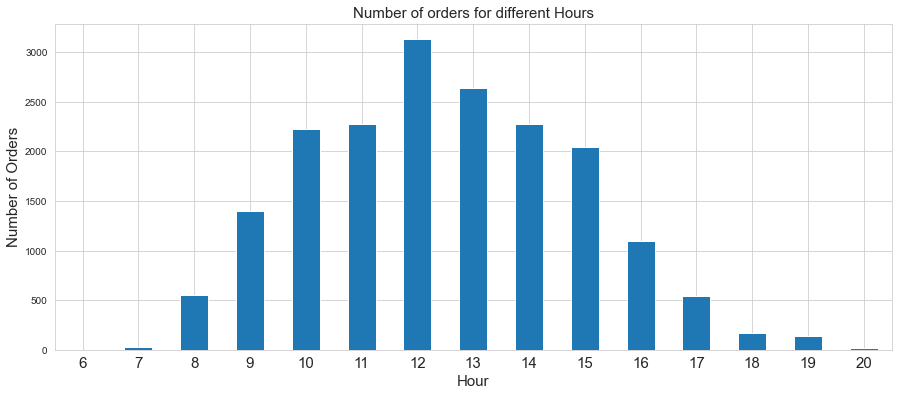

In [284]:
ax = data.groupby('invoice_num')['invoice_hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

## 13. How many orders for each country?

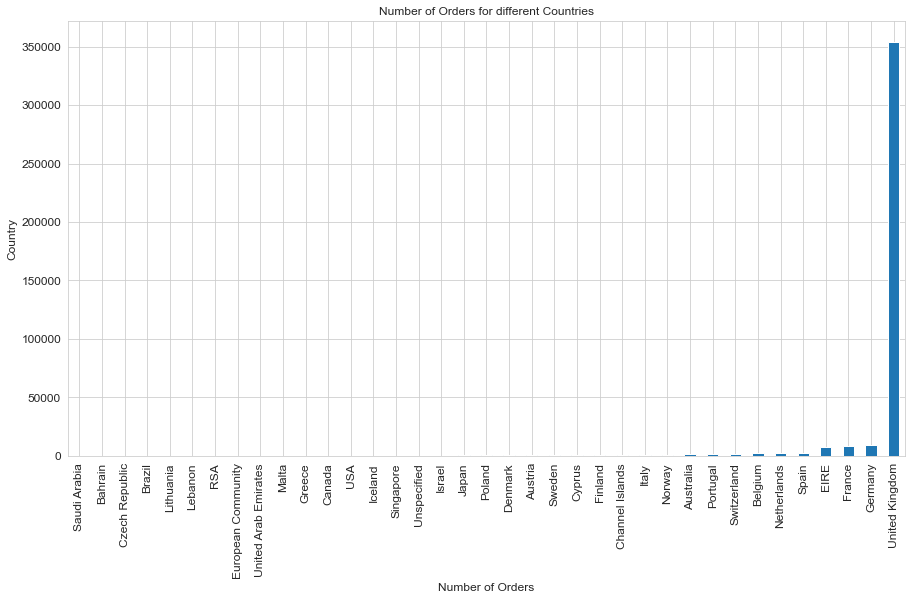

In [285]:
group_country_orders = data.groupby('country')['invoice_num'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='bar', fontsize=12,)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

## 14. Orders trend across months

In [286]:
data.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

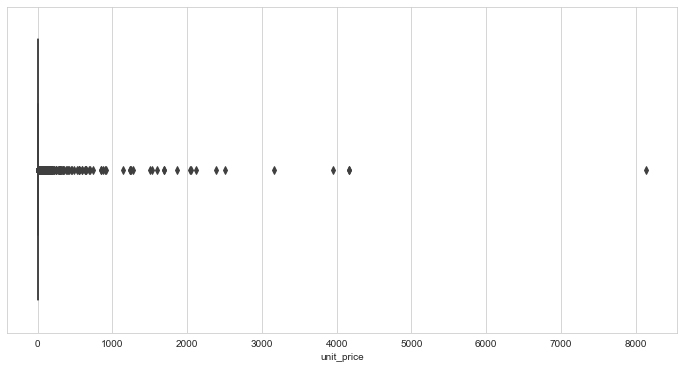

In [287]:
plt.subplots(figsize=(12,6))
sns.boxplot(data.unit_price)
plt.show()# check the distribution of unit pri

In [288]:
data = data[data.unit_price == 0]

In [289]:
data.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,cust_id,country,invoice_year,invoice_month,invoice_day,invoice_hour,invoice_min,amount_spent
9302,537197,2010-12-05 14:02:00,22841,round cake tin vintage green,1,0.0,12647,Germany,2010,12,5,14,2,0.0
33576,539263,2010-12-16 14:36:00,22580,advent calendar gingham sack,4,0.0,16560,United Kingdom,2010,12,16,14,36,0.0
40089,539722,2010-12-21 13:45:00,22423,regency cakestand 3 tier,10,0.0,14911,EIRE,2010,12,21,13,45,0.0
47068,540372,2011-01-06 16:41:00,22090,paper bunting retrospot,24,0.0,13081,United Kingdom,2011,1,6,16,41,0.0
47070,540372,2011-01-06 16:41:00,22553,plasters in tin skulls,24,0.0,13081,United Kingdom,2011,1,6,16,41,0.0


In [290]:
data.invoice_date.value_counts().sort_index()

2010-12-05 14:02:00    1
2010-12-16 14:36:00    1
2010-12-21 13:45:00    1
2011-01-06 16:41:00    2
2011-01-13 15:10:00    1
2011-02-10 13:08:00    1
2011-03-23 10:25:00    1
2011-03-30 12:45:00    1
2011-04-04 14:42:00    1
2011-04-14 18:57:00    1
2011-05-12 15:21:00    1
2011-05-20 14:13:00    1
2011-07-26 12:24:00    1
2011-07-28 17:09:00    1
2011-08-01 11:44:00    1
2011-08-11 11:42:00    1
2011-08-26 14:19:00    4
2011-09-25 12:22:00    1
2011-09-27 09:46:00    1
2011-10-06 08:17:00    1
2011-10-13 12:50:00    1
2011-10-26 14:36:00    1
2011-11-03 11:26:00    1
2011-11-03 11:47:00    1
2011-11-03 13:24:00    1
2011-11-04 11:55:00    1
2011-11-07 13:22:00    1
2011-11-07 16:34:00    2
2011-11-10 11:49:00    2
2011-11-17 19:52:00    1
2011-11-18 10:42:00    1
2011-11-18 13:23:00    1
2011-11-21 11:57:00    1
2011-11-25 15:57:00    1
Name: invoice_date, dtype: int64

In [ ]:
ax = data.invoice_date.value_counts().sort_index().plot(kind='bar',figsize=(12,6),)
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
plt.show()


In [292]:
data.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,cust_id,country,invoice_year,invoice_month,invoice_day,invoice_hour,invoice_min,amount_spent
9302,537197,2010-12-05 14:02:00,22841,round cake tin vintage green,1,0.0,12647,Germany,2010,12,5,14,2,0.0
33576,539263,2010-12-16 14:36:00,22580,advent calendar gingham sack,4,0.0,16560,United Kingdom,2010,12,16,14,36,0.0
40089,539722,2010-12-21 13:45:00,22423,regency cakestand 3 tier,10,0.0,14911,EIRE,2010,12,21,13,45,0.0
47068,540372,2011-01-06 16:41:00,22090,paper bunting retrospot,24,0.0,13081,United Kingdom,2011,1,6,16,41,0.0
47070,540372,2011-01-06 16:41:00,22553,plasters in tin skulls,24,0.0,13081,United Kingdom,2011,1,6,16,41,0.0


## 15. How much money spent by each country?

In [321]:
data['amount_spent'] = data['quantity'] * data['unit_price']

In [322]:
data.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount_spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


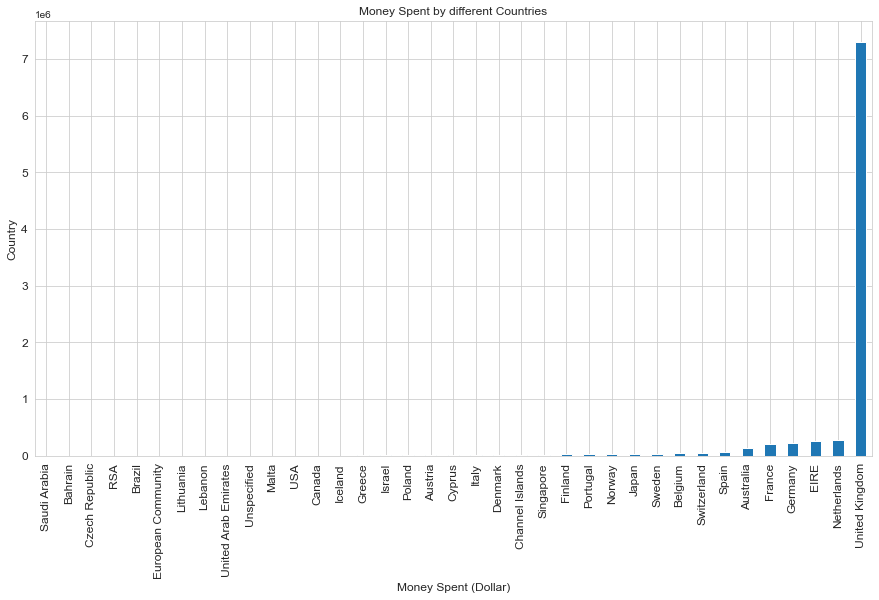

In [323]:
group_country_amount_spent = data.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='bar', fontsize=12,)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()